# Wave packets

We talked about particles (massive and massless) as having particle **and** wave properties. We can represent a particle as a traveling *wave packet*. Let's investigate how to build a wave packet.

A wave can be described by $y(x) = A\cos{k_1x}$, where $k = \frac{2\pi}{\lambda}$.

The code below generates and plots such a wave. Identify what each line of code does and execute the code.

Recall that `Shift`+`Enter` executes a cell.

In [84]:
# plot inside the notebook
%matplotlib inline
import matplotlib.pyplot as plt # import plotting package and call it plt
import numpy as np # import numpy package to deal with arrays

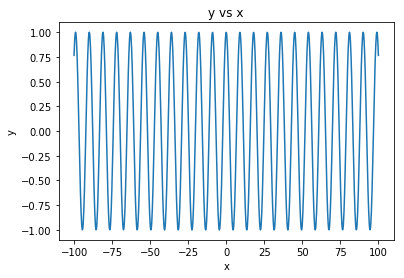

In [85]:
A = 1 # amplitude of wave
x = np.linspace(-100,100,1000) # generate 1000 x values equally spaced between -100 and 100
lam = 9 # wavelength
k = 2*np.pi/lam # wave number
y = A*np.cos(k*x) # y(x) values

plt.plot(x,y) # plot!
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x')
plt.show() # show the plot!


This wave has a well defined wavelength (we explicity defined it!), but an undefined position. 


<font color="blue">
    
Double click and type response here

Now, create another wave with $A = 1$, $\lambda = 11$ and add it to the wave above to create a superposition of these two waves. Plot the resulting wave.

*Note:* For all of these plots, use the same x array that I created above.

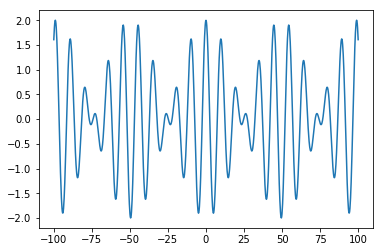

In [86]:
lam = 11 # wavelength
k = 2*np.pi/lam # wave number
y2 = y + A*np.cos(k*x) # y(x) values

plt.plot(x,y2)
plt.show()

This wave looks more wave packet-y, but it repeats. How did our uncertainty in the wavelength of the resultant wave change? How about the uncertainty in position? 

<font color="blue">
    
Double click and type response here

Let's make two more plots: 

 1) Superposition of 5 waves with $\lambda = 9,9.5,10,10.5,11$
 
 2) Superposition of 13 waves with $\lambda = 7,7.5,  8,   8.5,  9,   9.5, 10,  10.5, 11,  11.5, 12,  12.5, 13$
 
*Note:* You may be interested in making use of the fact that `np.linspace(9,11,5)` returns `[ 9.   9.5 10.  10.5 11. ]` (not required).

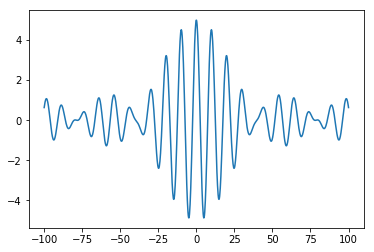

[ 7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13. ]


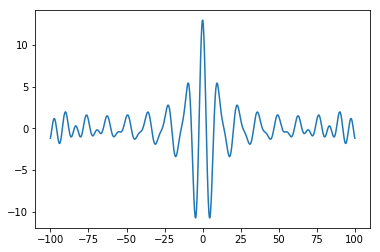

In [87]:
lambdas = np.linspace(9,11,5)

y_new = np.zeros(len(y))
for lam in lambdas:
    k = 2*np.pi/lam # wave number
    y_new += A*np.cos(k*x) # y(x) values

plt.plot(x,y_new) 
plt.show()

lambdas = np.linspace(7,13,13)
print(lambdas)
y_new = np.zeros(len(y))
for lam in lambdas:
    k = 2*np.pi/lam # wave number
    y_new += A*np.cos(k*x) # y(x) values

plt.plot(x,y_new) 

You should have something that nearly looks like a wave packet, except it still oscillates across all x. Discuss more generally how uncertainty in position and wavelength and uncertainty in position are related in these types of waves.

<font color="blue">
    
Double click and type response here

A wave packet which goes to zero as $x \rightarrow \pm\infty$ is more representative of particles that we encounter in nature. Multiplying our $\cos$ function by a Gaussian accomplishes this:


$$y(x) = Ae^{-2(\Delta\lambda \pi x/\lambda_0^2)^2}\cos{\frac{2\pi x}{\lambda_0}}$$

Plot this for $\lambda_0 = 10$ and $\Delta \lambda = 0.58$.

*Note:* in python $x^2$ is `x**2`. You can access cosine, exponentials, and pi with `np.pi`, `np.cos(x)`, and `np.exp(x)`. 

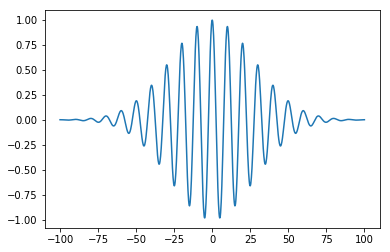

In [88]:
dlam = 0.58
lam0 = 10
y = A*np.exp(-2*(dlam*np.pi*x/lam0**2)**2)*np.cos(2*np.pi*x/lam0)
plt.plot(x,y)
plt.show()

This is a better approximation of the shape of a wave packet.

## Motion of a wave packet

Let's go back to our beats wave, which is a combination of two cosine waves. We can have them evolve in time like

$$y(x,t) = A_1\cos{(k_1x - \omega_1t)} + A_2\cos{(k_2x - \omega_2t)}$$
where $\omega = 2\pi f$.

The speed of an individual wave with a specific frequency is $v = \lambda f = \omega/k$. This is called the *phase speed*, and it is the speed of one component of the wave packet. 

What does this indicate about the shape of the wave packet? Will it change with time?

<font color="blue">
    
Double click and type response here

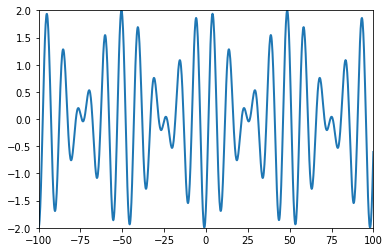

In [104]:
from matplotlib import animation
def ys(x,t):
    lam1 = 11 # wavelength
    lam2 = 9 # wavelength
    v1 = 6
    v2 = 4
    k1 = 2*np.pi/lam1 # wave number
    k2 = 2*np.pi/lam2 # wave number
    dk = k2 - k1
    w1 = 2*np.pi*v1/lam1
    w2 = 2*np.pi*v2/lam2
    return A*np.cos(k1*x-w1*t) + A*np.cos(k2*x-w2*t) # y(x) values
    

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-100, 100), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    #print(i)
    x = np.linspace(-100,100,1000)
    y = ys(x,i/10)
    line.set_data(x, y)
    return line,    
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)
#plt.plot(x,ys(x,0))
#anim.save('basic_animation.mp4', fps=30)#, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_jshtml())
#plt.show()

Aside: Given a waveform, you can do a Fourier analysis to get the wavelength composition of a repetitive function. This is something you will do in Computational Physics and Math Methods, and perhaps other courses, so we do not go through that mathematics here.